In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix

# 1. Loading the dataset

In [2]:
df = pd.read_csv('/content/lab2_data.csv')
df

,Year,Hard Disk Capacity (TB),Processor Speed (GHz),Price of Computer (Rs)
0,2020,1.5,3.5,63000
1,2020,2.0,3.6,65000
2,2020,2.5,3.7,68000
3,2020,3.0,3.8,72000
4,2020,3.5,3.9,75000
...,...,...,...,...
95,2023,5.0,4.8,105000
96,2024,6.0,5.2,125000
97,2024,6.5,5.3,130000
98,2024,5.5,5.0,115000


# 2.   Apply linear and multiple regression (Hot Code) and visualize the same.



## Linear Regression

In [3]:
x = df['Processor Speed (GHz)']
y = df['Price of Computer (Rs)']

In [5]:
x_mean = sum(x)/len(x)
y_mean = sum(y)/len(y)

In [6]:
# y = (w1 * x) + b0
# w1 = sum[ (xi - x_mean) * (yi - y_mean) ] / sum[ (xi - x_mean)**2 ]
# b0 = y_mean - (w1 * x_mean)

numerator, denominator = 0, 0
for x_val, y_val in zip(x, y):
    numerator += (x_val - x_mean) * (y_val - y_mean)
    denominator += (x_val - x_mean)**2

w1 = numerator / denominator
print(f"\nValue of w1 = {w1}\n")


Value of w1 = 0.9



In [7]:
w0 = y_mean - (w1 * x_mean)
print(f"\nValue of w0 = {w0}\n")


Value of w0 = 2.2



In [7]:
print("\nThe equation of the line is:\n")
print(f"y = {w0:.5f} + ({w1:.5f} * x)\n")


The equation of the line is:

y = -62605.40533 + (35423.09075 * x)



In [8]:
# Making predictions

def linear_regression_predict(x_val):
    return (w1 * x_val) + w0

y_pred = [linear_regression_predict(x_val) for x_val in x]

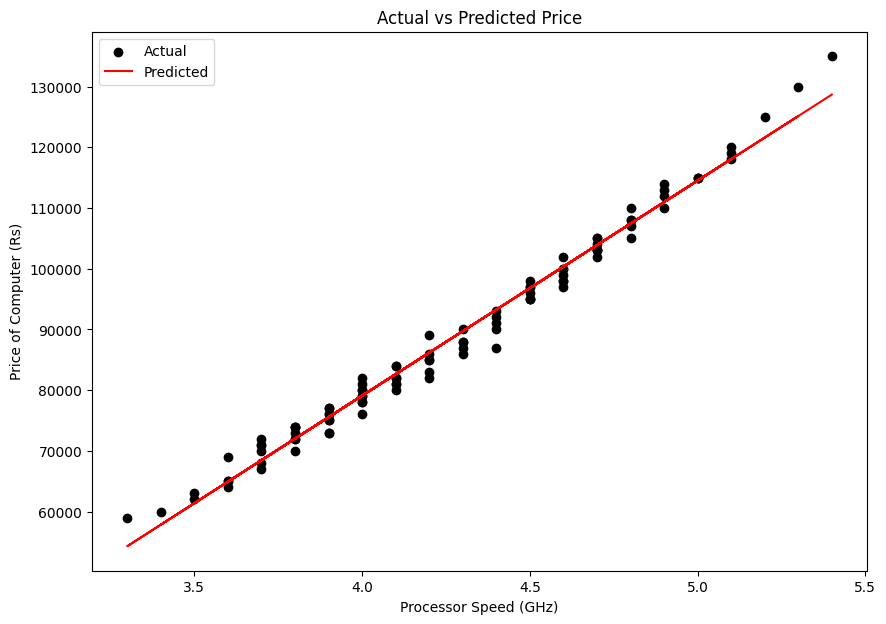

In [9]:
# Visualizing the results

plt.figure(figsize=[10, 7])

plt.scatter(x, y, color='black', label='Actual')
plt.plot(x, y_pred, color='r', label='Predicted')

plt.title('Actual vs Predicted Price')
plt.ylabel('Price of Computer (Rs)')
plt.xlabel('Processor Speed (GHz)')
plt.legend()
plt.show()

In [10]:
# R2 score

numerator, denominator = 0, 0
for y_actual, y_predicted in zip(y, y_pred):
    numerator += (y_actual - y_predicted)**2
    denominator += (y_actual - y_mean)**2

error = numerator / denominator
r2_score_calc = 1 - error

print(f"\nThe R2 score = {r2_score_calc:.6f}\n")


The R2 score = 0.984894



In [11]:
# RMSE

numerator = 0
for y_actual, y_predicted in zip(y, y_pred):
    numerator += (y_actual - y_predicted)**2

mse = numerator / len(y)
rmse = np.sqrt(mse)

print(f"\nThe RMSE = {rmse:.6f}\n")


The RMSE = 2082.102864



## Multiple Regression

In [12]:
y = df['Price of Computer (Rs)']
x1 = df['Processor Speed (GHz)']
x2 = df['Hard Disk Capacity (TB)']

In [13]:
x1_mean = sum(x1)/len(x1)
x2_mean = sum(x2)/len(x2)
y_mean = sum(y)/len(y)

In [14]:
table = pd.DataFrame({
    'X1': x1, 'X2': x2, 'y': y
})

table['X1_squared'] = table['X1'] ** 2
table['X2_squared'] = table['X2'] ** 2
table['X1 * y'] = table['X1'] * table['y']
table['X2 * y'] = table['X2'] * table['y']
table['X1 * X2'] = table['X1'] * table['X2']

table

,X1,X2,y,X1_squared,X2_squared,X1 * y,X2 * y,X1 * X2
0,3.5,1.5,63000,12.25,2.25,220500.0,94500.0,5.25
1,3.6,2.0,65000,12.96,4.00,234000.0,130000.0,7.20
2,3.7,2.5,68000,13.69,6.25,251600.0,170000.0,9.25
3,3.8,3.0,72000,14.44,9.00,273600.0,216000.0,11.40
4,3.9,3.5,75000,15.21,12.25,292500.0,262500.0,13.65
...,...,...,...,...,...,...,...,...
95,4.8,5.0,105000,23.04,25.00,504000.0,525000.0,24.00
96,5.2,6.0,125000,27.04,36.00,650000.0,750000.0,31.20
97,5.3,6.5,130000,28.09,42.25,689000.0,845000.0,34.45
98,5.0,5.5,115000,25.00,30.25,575000.0,632500.0,27.50


In [15]:
sum_x1 = sum(x1)
sum_x2 = sum(x2)
sum_y = sum(y)

In [16]:
sum_x1_sq = sum(table['X1_squared']) - (sum_x1**2 / len(x1))
sum_x2_sq = sum(table['X2_squared']) - (sum_x2**2 / len(x2))
sum_x1y = sum(table['X1 * y']) - (sum_x1 * sum_y / len(x1))
sum_x2y = sum(table['X2 * y']) - (sum_x2 * sum_y / len(x2))
sum_x1x2 = sum(table['X1 * X2']) - (sum_x1 * sum_x2 / len(x1))

In [17]:
b1 = (sum_x2_sq * sum_x1y - sum_x1x2 * sum_x2y) / (sum_x1_sq * sum_x2_sq - sum_x1x2**2)
b2 = (sum_x1_sq * sum_x2y - sum_x1x2 * sum_x1y) / (sum_x1_sq * sum_x2_sq - sum_x1x2**2)
b0 = y_mean - (b1 * x1_mean) - (b2 * x2_mean)

In [18]:
print(f"y = {b0:.5f} + ({b1:.5f} * x1) + ({b2:.5f} * x2)")

y = -42109.76782 + (28381.80026 * x1) + (2502.34922 * x2)


In [19]:
# Making predictions

def multilinear_regression_predict(x1, x2):
    return b0 + (b1 * x1) + (b2 * x2)

X1, X2 = np.meshgrid(x1, x2)

y_pred = multilinear_regression_predict(X1, X2)

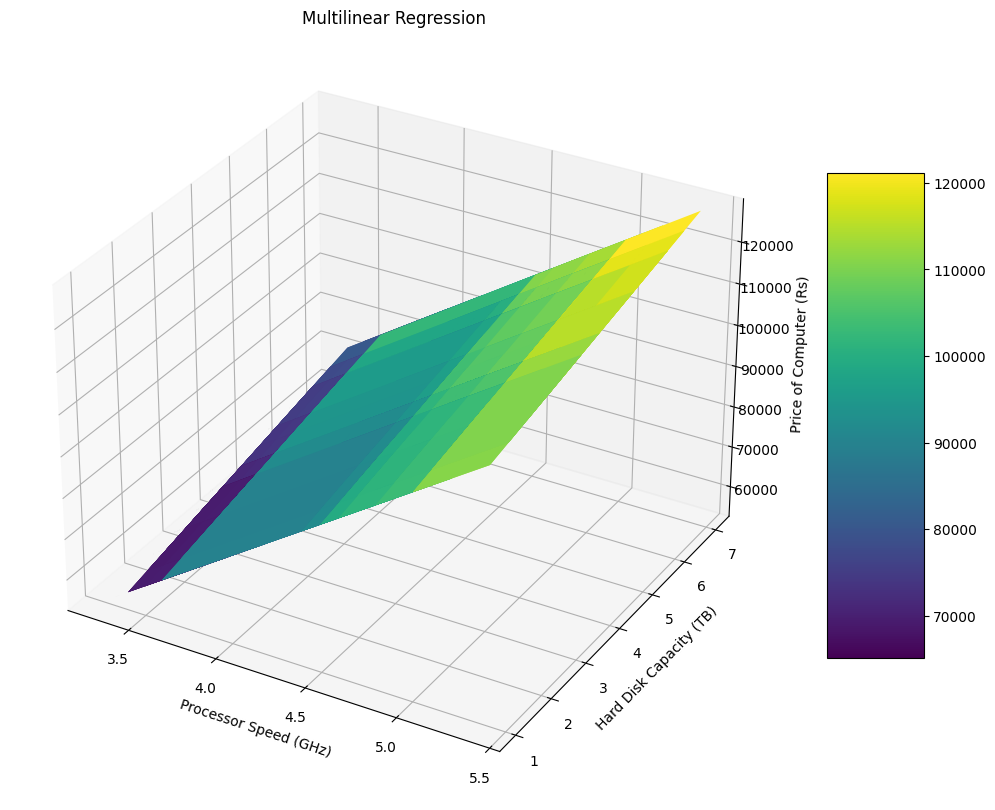

In [20]:
fig = plt.figure(figsize=(20, 10))

ax2 = fig.add_subplot(122, projection='3d')
surf = ax2.plot_surface(X1, X2, y_pred, cmap='viridis', label='Predicted')

ax2.set_xlabel('Processor Speed (GHz)')
ax2.set_ylabel('Hard Disk Capacity (TB)')
ax2.set_zlabel('\nPrice of Computer (Rs)')
ax2.set_title('Multilinear Regression')
fig.colorbar(surf, ax=ax2, shrink=0.5, aspect=5)
plt.tight_layout()
plt.show()

In [21]:
y_pred = multilinear_regression_predict(x1, x2)

In [22]:
# R2 score

numerator, denominator = 0, 0
for y_actual, y_predicted in zip(y, y_pred):
    numerator += (y_actual - y_predicted)**2
    denominator += (y_actual - y_mean)**2

error = numerator / denominator
r2_score_calc = 1 - error

print(f"\nThe R2 score = {r2_score_calc:.6f}\n")


The R2 score = 0.987271



In [23]:
# RMSE

numerator = 0
for y_actual, y_predicted in zip(y, y_pred):
    numerator += (y_actual - y_predicted)**2

mse = numerator / len(y)
rmse = np.sqrt(mse)

print(f"\nThe RMSE = {rmse:.6f}\n")


The RMSE = 1911.302484



# 3. Find best degree for polynomial feature. Apply polynomial regression and visualize the same.

In [24]:
x = df.iloc[:, 0].values.reshape(-1, 1)
y = df.iloc[:, 1].values

In [25]:
def find_best_degree(x, y, max_degree=10):
    degrees = range(1, max_degree + 1)
    mean_scores = []

    for degree in degrees:
        poly = PolynomialFeatures(degree=degree)
        X_poly = poly.fit_transform(x)
        model = LinearRegression()
        scores = cross_val_score(model, X_poly, y, scoring='neg_mean_squared_error', cv=5)
        mean_scores.append(np.mean(scores))

    best_degree = degrees[np.argmax(mean_scores)]
    return best_degree, mean_scores

# Find the best polynomial degree
best_degree, mean_scores = find_best_degree(x, y)

print(f"\nBest degree = {best_degree}\n")



Best degree = 2



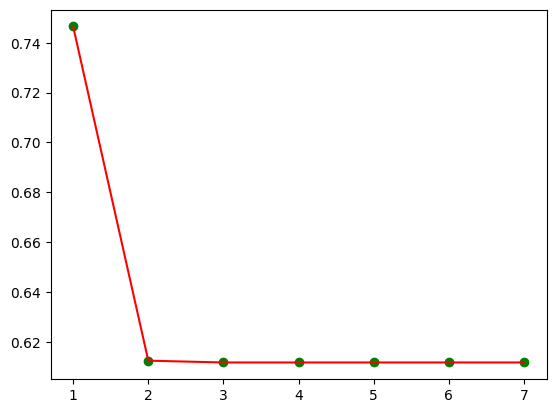

In [26]:
number_degrees = [1, 2, 3, 4, 5, 6, 7]
plt_mean_squared_error = []

for degree in number_degrees:
   poly_model = PolynomialFeatures(degree=degree)

   poly_x_values = poly_model.fit_transform(x)
   poly_model.fit(poly_x_values, y)

   reg = LinearRegression()
   reg.fit(poly_x_values, y)
   y_pred = reg.predict(poly_x_values)

   plt_mean_squared_error.append(mean_squared_error(y, y_pred))

plt.scatter(number_degrees, plt_mean_squared_error, color="green")
plt.plot(number_degrees, plt_mean_squared_error, color="red")

# 4.  Logistic regression add one attribute (target) which tells its low/medium/high budget model based on price. Compute Confusion Matrix, Accuracy, Recall, Precision, Specificity and ROC curve.

In [27]:
conditions = [
    (df['Price of Computer (Rs)'] <= 80000),
    (df['Price of Computer (Rs)'] > 80000) & (df['Price of Computer (Rs)'] <= 110000),
    (df['Price of Computer (Rs)'] > 110000)
]

categories = ['Low', 'Medium', 'High']

df['Salary Type'] = pd.cut(df['Price of Computer (Rs)'],
                           bins=[0, 80000, 110000, float('inf')],
                           labels=categories,
                           right=False)

df

,Year,Hard Disk Capacity (TB),Processor Speed (GHz),Price of Computer (Rs),Salary Type
0,2020,1.5,3.5,63000,Low
1,2020,2.0,3.6,65000,Low
2,2020,2.5,3.7,68000,Low
3,2020,3.0,3.8,72000,Low
4,2020,3.5,3.9,75000,Low
...,...,...,...,...,...
95,2023,5.0,4.8,105000,Medium
96,2024,6.0,5.2,125000,High
97,2024,6.5,5.3,130000,High
98,2024,5.5,5.0,115000,High


In [28]:
y = df['Salary Type']
x = df.drop(columns=['Price of Computer (Rs)', 'Year', 'Salary Type'], axis=1)

In [29]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [31]:
logreg = LogisticRegression(multi_class='ovr')
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

In [32]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy = {accuracy:.4f}\n")

precision = precision_score(y_test, y_pred, average='weighted')
print(f"\nPrecision: {precision:.4f}\n")

recall = recall_score(y_test, y_pred, average='weighted')
print(f"\nRecall: {recall:.4f}\n")


def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    fp = cm.sum(axis=0) - np.diag(cm)
    fn = cm.sum(axis=1) - np.diag(cm)
    tp = np.diag(cm)
    tn = cm.sum() - (fp + fn + tp)
    specificity = tn / (tn + fp)
    return np.mean(specificity)

specificity = specificity_score(y_test, y_pred)
print(f"\nSpecificity: {specificity:.4f}\n")


Accuracy = 0.7600


Precision: 0.7733


Recall: 0.7600


Specificity: 0.8503



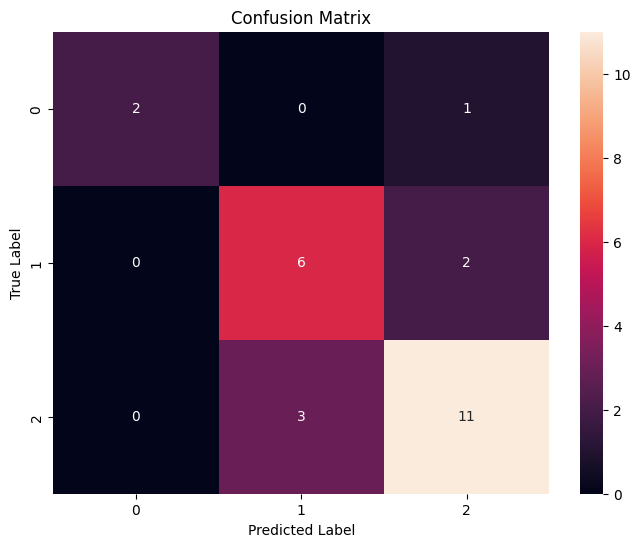

In [33]:
plt.figure(figsize=(8, 6))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


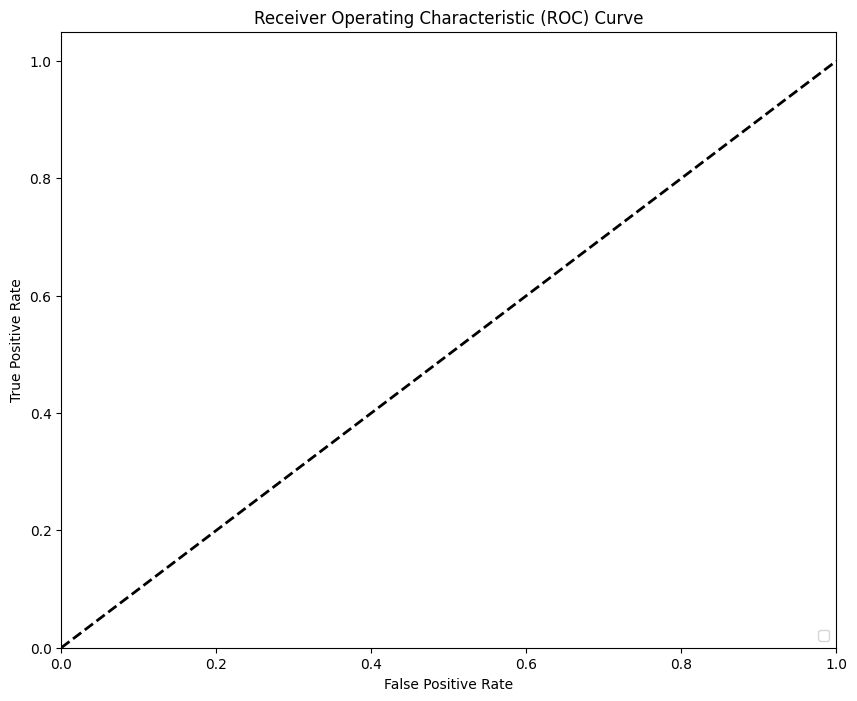

In [34]:
y_score = logreg.predict_proba(x_test)

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_score.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_score[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green']

for i, color in zip(range(n_classes), colors):
    if not np.isnan(roc_auc[i]):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()